In [58]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import regionmask
import READ_EDAB_Utilities_py as reupy
import copernicusmarine
import numpy as np

In [ ]:
# Load in the mom6 data
#url = "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/regrid/ocean_monthly.199301-201912.tob.nc"
#mom6_bt = xr.open_dataset(url)

In [2]:
mom6_bt = xr.open_dataset('ocean_monthly.199301-201912.tob.nc')

In [3]:
mom6_bt

<xarray.Dataset>
Dimensions:  (lon: 774, lat: 844, time: 324)
Coordinates:
  * lon      (lon) float64 261.6 261.6 261.7 261.8 ... 323.7 323.8 323.8 323.9
  * lat      (lat) float64 5.273 5.335 5.398 5.461 ... 57.97 58.04 58.1 58.16
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12:00:00
Data variables:
    tob      (time, lat, lon) float32 ...
Attributes:
    NumFilesInSet:       1
    title:               NWA12_COBALT_2023_04_kpo4-coastatten-physics
    associated_files:    areacello: 19930101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello
    history:             Derived and written at NOAA Physical Science Laboratory
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    contact:             chia-wei.hsu@noaa.gov
    dataset:             regional mom6 regrid

In [4]:
mom6_bt_cropped = mom6_bt.sel(lat = slice(30,48), lon = slice(260, 300))

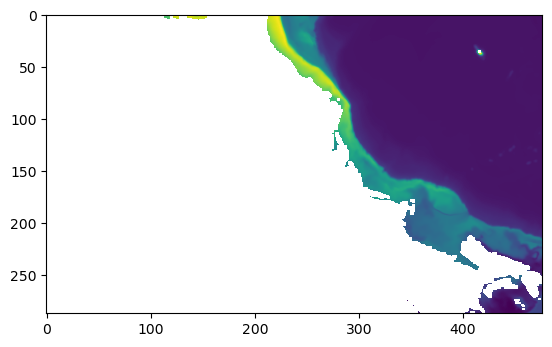

In [5]:
plt.imshow(mom6_bt_cropped.tob[10,:,:])

In [6]:
# Load in the shapefile
epu = gpd.read_file('EPU_shape/EPU_NOESTUARIES.shp')

In [7]:
mab = epu[epu.EPU == 'MAB']
gom = epu[epu.EPU == 'GOM']
ss = epu[epu.EPU == 'SS']
gb = epu[epu.EPU == 'GB']

In [8]:
mab_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', mab)
gom_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', gom)
ss_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', ss)
gb_m6 = reupy.crop_nd(mom6_bt_cropped, 'lon', 'lat', gb)

In [ ]:
help(reupy.crop_nd)

In [ ]:
mom6_bt

In [10]:
glorys_bt = copernicusmarine.open_dataset(dataset_id="cmems_mod_glo_phy_my_0.083deg_P1M-m")
glorys_bt

Fetching catalog: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.01s/it]
INFO - 2024-08-27T15:31:18Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-08-27T15:31:18Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-27T15:31:24Z - Service was not specified, the default one was selected: "arco-geo-series"


username:

  lgruenburg


password:

  ········


<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 2041, longitude: 4320, time: 342)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2021-06-01
Data variables:
    bottomT    (time, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
    siconc     (time, latitude, longitude) float32 ...
    sithick    (time, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    usi        (time, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    vsi        (time, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
Attributes: (12/14)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-001-030-monthly
    institution:                   Mercator Ocean
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly mean fields for product GLOBAL_REA...

In [12]:
glorys_bt_cropped = glorys_bt.bottomT.sel(latitude = slice(30,48), longitude = slice(-80, -60))

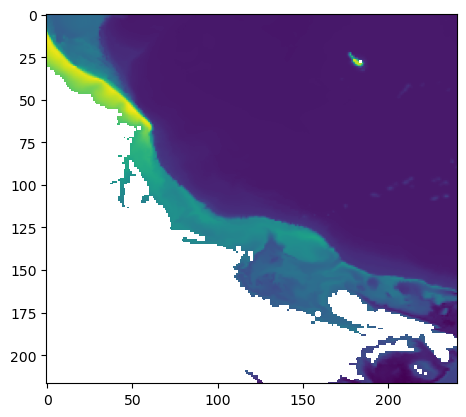

In [13]:
plt.imshow(glorys_bt_cropped[10,:,:])

In [14]:
glorys_bt_cropped.to_netcdf('glorys_bt_cropped')

In [15]:
mab_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', mab)
gom_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', gom)
ss_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', ss)
gb_gl = reupy.crop_nd(glorys_bt_cropped, 'longitude', 'latitude', gb)

In [27]:
mab_gl_anom = mab_gl.mean(['latitude','longitude']).groupby('time.season') - mab_gl.mean(['latitude','longitude']).groupby('time.season').mean('time')

In [50]:
mab_gl_anom = mab_gl.mean(['latitude','longitude']).groupby('time.year').mean()
mab_m6_anom = mab_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

gb_gl_anom = gb_gl.mean(['latitude','longitude']).groupby('time.year').mean()
gb_m6_anom = gb_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

ss_gl_anom = ss_gl.mean(['latitude','longitude']).groupby('time.year').mean()
ss_m6_anom = ss_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

gom_gl_anom = gom_gl.mean(['latitude','longitude']).groupby('time.year').mean()
gom_m6_anom = gom_m6.tob.mean(['lat','lon']).groupby('time.year').mean()

Text(0.5, 1.0, 'SS')

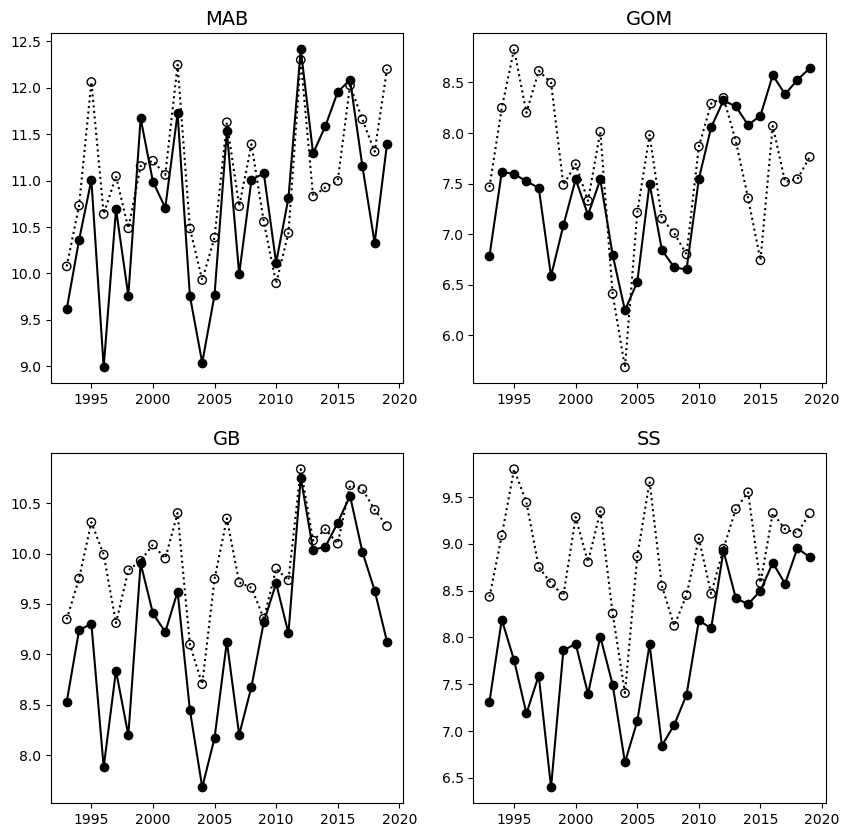

In [74]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1993, 2020), mab_gl_anom.sel(year = slice(1993, 2019)), c = 'k')
ax[0,0].scatter(np.arange(1993, 2020), mab_gl_anom.sel(year = slice(1993, 2019)), c = 'k')

ax[0,0].plot(np.arange(1993, 2020), mab_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[0,0].scatter(np.arange(1993, 2020), mab_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), gom_gl_anom.sel(year = slice(1993, 2019)), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), gom_gl_anom.sel(year = slice(1993, 2019)), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), gom_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), gom_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('GOM', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), gb_gl_anom.sel(year = slice(1993, 2019)), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), gb_gl_anom.sel(year = slice(1993, 2019)), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), gb_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), gb_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('GB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), ss_gl_anom.sel(year = slice(1993, 2019)), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), ss_gl_anom.sel(year = slice(1993, 2019)), c = 'k')

ax[1,1].plot(np.arange(1993, 2020), ss_m6_anom.sel(year = slice(1993, 2019)), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), ss_m6_anom.sel(year = slice(1993, 2019)),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('SS', fontsize = 14)

In [98]:
seasonal_avgs_mab_m6 = mab_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_mab_gl = mab_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [117]:
seasonal_avgs_gb_m6 = gb_m6.mean(['lat','lon']).resample(time = 'QE-JAN').mean()
seasonal_avgs_gb_gl = gb_gl.mean(['latitude','longitude']).resample(time = 'QE-JAN').mean()

In [118]:
winters_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(0,109, 4)]
springs_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(1,109, 4)]
summers_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(2,109, 4)]
autumns_mab_m6 = seasonal_avgs_mab_m6.tob[np.arange(3,109, 4)]

winters_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(0,109, 4)]
springs_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(1,109, 4)]
summers_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(2,109, 4)]
autumns_gb_m6 = seasonal_avgs_gb_m6.tob[np.arange(3,109, 4)]

In [119]:
winters_mab_gl = seasonal_avgs_mab_gl[np.arange(0,109, 4)]
springs_mab_gl = seasonal_avgs_mab_gl[np.arange(1,109, 4)]
summers_mab_gl = seasonal_avgs_mab_gl[np.arange(2,109, 4)]
autumns_mab_gl = seasonal_avgs_mab_gl[np.arange(3,109, 4)]

winters_gb_gl = seasonal_avgs_gb_gl[np.arange(0,109, 4)]
springs_gb_gl = seasonal_avgs_gb_gl[np.arange(1,109, 4)]
summers_gb_gl = seasonal_avgs_gb_gl[np.arange(2,109, 4)]
autumns_gb_gl = seasonal_avgs_gb_gl[np.arange(3,109, 4)]

In [109]:
winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:])

<xarray.DataArray 'bottomT' (time: 27)>
array([-0.6634903 ,  0.20156384, -1.0480757 , -1.589386  , -0.79097843,
       -0.62033844,  0.9815035 , -1.2179174 ,  1.0517273 , -0.3554001 ,
       -0.6188326 , -0.83933353, -0.15401077,  0.85919285, -1.165947  ,
        0.02684784,  0.4560318 , -1.1740961 ,  1.045681  ,  0.20071316,
        0.47890377,  0.8152771 ,  2.0138044 ,  0.65385914,  0.6353617 ,
       -0.28079128,  1.0981512 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1994-01-31 1995-01-31 ... 2020-01-31

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_30824\2765720294.py:38: SyntaxWarning: invalid escape sequence '\c'
  ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)


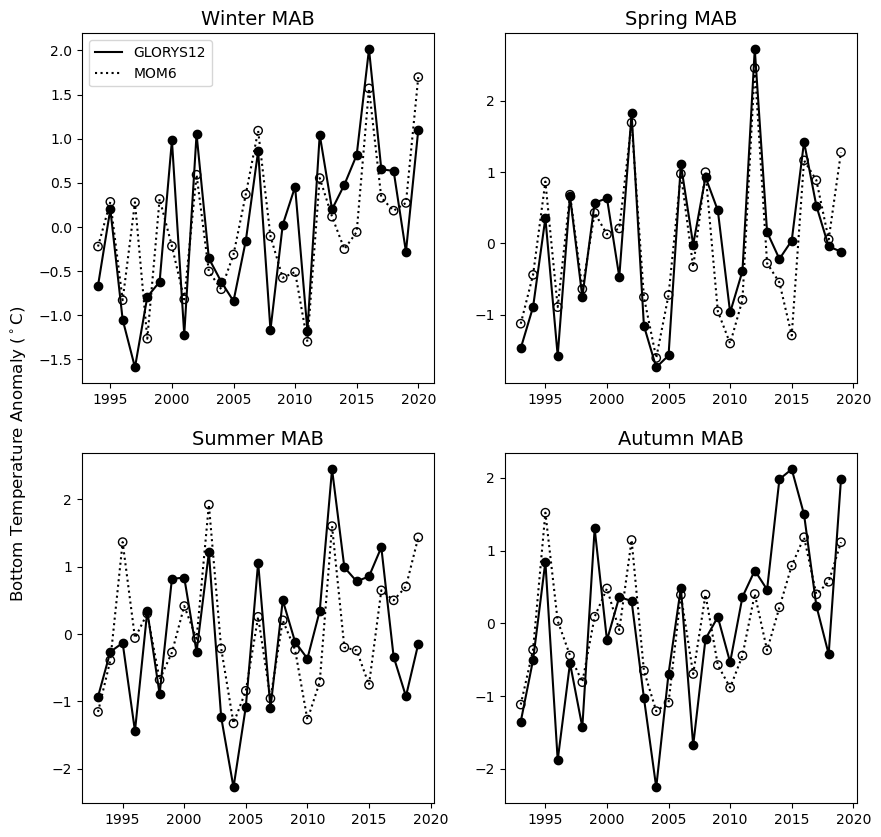

In [149]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1994, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k', label = 'GLORYS12')
ax[0,0].scatter(np.arange(1994, 2021), winters_mab_gl[1:] - np.nanmean(winters_mab_gl[1:]), c = 'k')

ax[0,0].plot(np.arange(1994, 2021), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]), c = 'k', linestyle = ':', label = 'MOM6')
ax[0,0].scatter(np.arange(1994, 2021), winters_mab_m6[1:] - np.nanmean(winters_mab_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter MAB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_gl - np.nanmean(springs_mab_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_mab_m6 - np.nanmean(springs_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('Spring MAB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_gl - np.nanmean(summers_mab_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_mab_m6 - np.nanmean(summers_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('Summer MAB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_gl - np.nanmean(autumns_mab_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_mab_m6 - np.nanmean(autumns_mab_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn MAB', fontsize = 14)

ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Bottom Temperature Anomaly ($^\circ$C)', fontsize = 12)
ax[0,0].yaxis.set_label_coords(-0.15,-0.2)

Text(0.5, 1.0, 'Autumn GB')

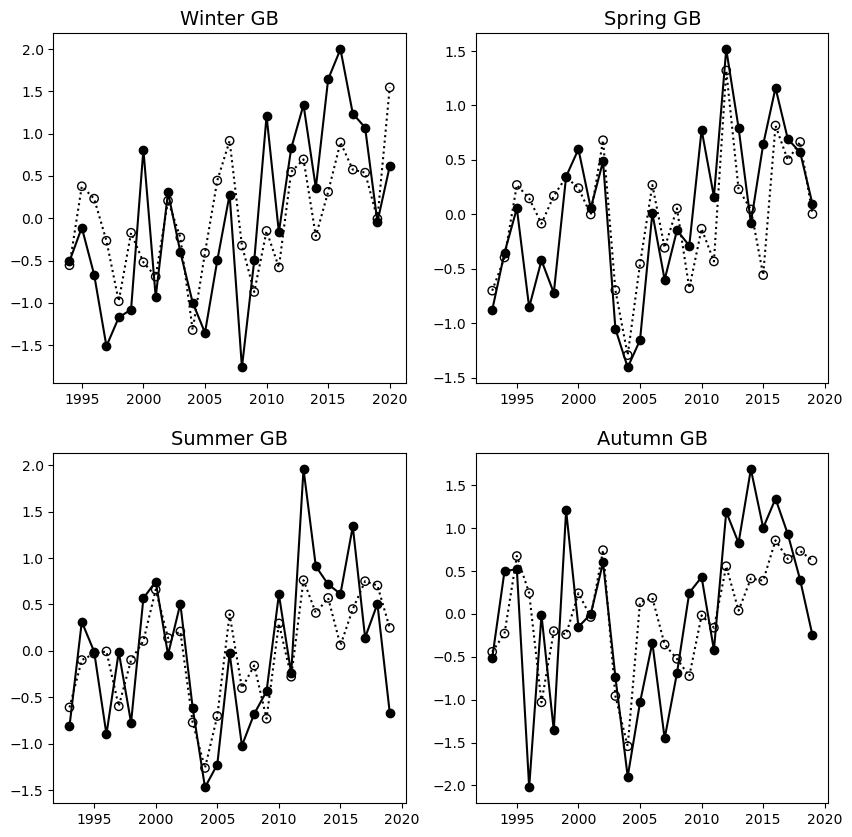

In [120]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])

ax[0,0].plot(np.arange(1994, 2021), winters_gb_gl[1:] - np.nanmean(winters_gb_gl[1:]), c = 'k')
ax[0,0].scatter(np.arange(1994, 2021), winters_gb_gl[1:] - np.nanmean(winters_gb_gl[1:]), c = 'k')

ax[0,0].plot(np.arange(1994, 2021), winters_gb_m6[1:] - np.nanmean(winters_gb_m6[1:]), c = 'k', linestyle = ':')
ax[0,0].scatter(np.arange(1994, 2021), winters_gb_m6[1:] - np.nanmean(winters_gb_m6[1:]),facecolor = 'none', edgecolor = 'k')

ax[0,0].set_title('Winter GB', fontsize = 14)


ax[0,1].plot(np.arange(1993, 2020), springs_gb_gl - np.nanmean(springs_gb_gl), c = 'k')
ax[0,1].scatter(np.arange(1993, 2020), springs_gb_gl - np.nanmean(springs_gb_gl), c = 'k')

ax[0,1].plot(np.arange(1993, 2020), springs_gb_m6 - np.nanmean(springs_gb_m6), c = 'k', linestyle = ':')
ax[0,1].scatter(np.arange(1993, 2020), springs_gb_m6 - np.nanmean(springs_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[0,1].set_title('Spring GB', fontsize = 14)


ax[1,0].plot(np.arange(1993, 2020), summers_gb_gl - np.nanmean(summers_gb_gl), c = 'k')
ax[1,0].scatter(np.arange(1993, 2020), summers_gb_gl - np.nanmean(summers_gb_gl), c = 'k')

ax[1,0].plot(np.arange(1993, 2020), summers_gb_m6 - np.nanmean(summers_gb_m6), c = 'k', linestyle = ':')
ax[1,0].scatter(np.arange(1993, 2020), summers_gb_m6 - np.nanmean(summers_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[1,0].set_title('Summer GB', fontsize = 14)


ax[1,1].plot(np.arange(1993, 2020), autumns_gb_gl - np.nanmean(autumns_gb_gl), c = 'k')
ax[1,1].scatter(np.arange(1993, 2020), autumns_gb_gl - np.nanmean(autumns_gb_gl), c = 'k')
ax[1,1].plot(np.arange(1993, 2020), autumns_gb_m6 - np.nanmean(autumns_gb_m6), c = 'k', linestyle = ':')
ax[1,1].scatter(np.arange(1993, 2020), autumns_gb_m6 - np.nanmean(autumns_gb_m6),facecolor = 'none', edgecolor = 'k')

ax[1,1].set_title('Autumn GB', fontsize = 14)

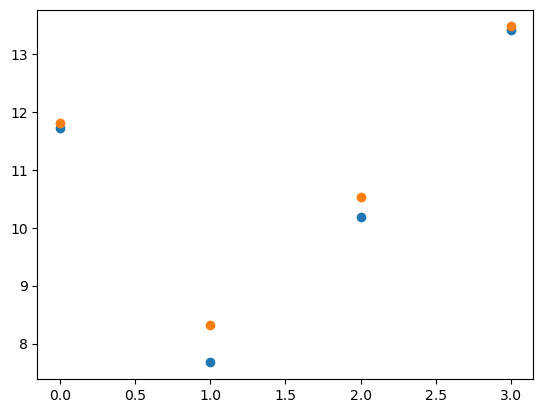

In [123]:
plt.scatter([0,1,2,3], [np.nanmean(winters_mab_gl), np.nanmean(springs_mab_gl), np.nanmean(summers_mab_gl), np.nanmean(autumns_mab_gl)])
plt.scatter([0,1,2,3], [np.nanmean(winters_mab_m6), np.nanmean(springs_mab_m6), np.nanmean(summers_mab_m6), np.nanmean(autumns_mab_m6)])

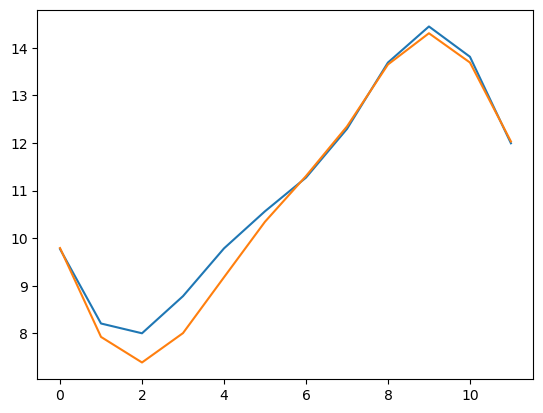

In [129]:
fig, ax = plt.subplots(
plt.plot(mab_m6.mean(['lat','lon']).groupby('time.month').mean('time').tob)
plt.plot(mab_gl.mean(['latitude','longitude']).groupby('time.month').mean('time'))

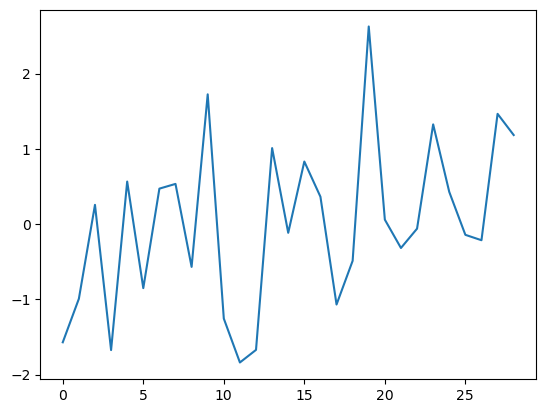

In [97]:
plt.plot(springs_mab_gl - np.nanmean(springs_mab_gl))